# Introduction

In today's digital landscape, the Google Play Store serves as a pivotal platform for Android apps, housing millions of applications spanning various categories. For developers and marketers, understanding user preferences, sentiments, and behaviors within this ecosystem is paramount for app success.

# Objective
As a data analyst, I aim to utilize two datasets: one containing Google Play app information and another with user reviews and sentiment analysis to identify the key factors contributing to the success of mobile applications on the Google Play Store. Ultimately, this analysis will provide actionable insights to app developers and marketers, enabling them to optimize app development, refine marketing strategies, and enhance user experiences, thereby increasing the likelihood of app success on the Google Play Store.

In [1]:
import numpy as np # linear algebra|
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
playstore = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
user_reviews = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv')

In [3]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(playstore.shape)
print('\n')
print(user_reviews.shape)

(10841, 13)


(64295, 5)


In [5]:
print(playstore.info())
print('\n')
print(user_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dty

In [6]:
print(playstore.isnull().sum())
print('\n')
print(user_reviews.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


# Data Preprocessing

In [7]:
#handling missing values
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
threshold = len(playstore) * 0.05
cols_to_drop = playstore.columns[playstore.isna().sum() <= threshold]
playstore.dropna(subset=cols_to_drop,inplace=True)

In [9]:
playstore.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [10]:
playstore[playstore['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Since there is no way to deal with right now We will not drop na values in review

In [11]:
#Chaning types
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
playstore.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [13]:
#changing datatype
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

playstore['Installs'] = playstore['Installs'].str.replace(r'[,+]', '', regex=True)
playstore['Installs'] = playstore['Installs'].astype('int')

playstore['Reviews'] = playstore['Reviews'].astype('int')


def clean_price(price):
    # Check if the price starts with '$' and handle conversion
    if price[0] == '$':
        # Remove '$' and convert to float
        return float(price[1:]) if price[1:] != '0' else 0.0
    return float(price)
    
playstore['Price'] = playstore['Price'].astype(str)

playstore['Price'] = playstore['Price'].apply(clean_price)


In [14]:
playstore.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [15]:
user_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [16]:
# droppping NA values
# since we need Sentinment to perform any Sentimental Analysis
# we can drop those with NA values in Sentiment

user_reviews.dropna(subset=['Sentiment'],inplace = True)

In [17]:
user_reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [18]:
user_reviews.dropna(inplace= True)
user_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [19]:
user_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [20]:
playstore[playstore.duplicated]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [21]:
# Removing Duplicates
col = ['App','Size','Type','Genres']
playstore.drop_duplicates(subset=col , keep='first',inplace = True)

In [22]:
# playstore[playstore.duplicated(['App','Size','Type','Genres','Last Updated'])]

# Analysis

In [23]:
playstore.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6561,Hambo,GAME,4.4,125578,17M,5000000,Free,0.0,Everyone,Action,2015-07-06,1.1.8,2.1 and up
6686,Br Browser,SOCIAL,4.9,29,2.5M,500,Free,0.0,Everyone,Social,2018-03-20,5.0,5.0 and up
8958,U.S.A DV Lottery Process,FAMILY,4.5,8,1.7M,1000,Free,0.0,Everyone,Education,2017-03-12,1.0,4.1 and up
8132,Security Camera CZ,HOUSE_AND_HOME,4.4,137,19M,10000,Free,0.0,Everyone,House & Home,2018-07-17,1.1.10,4.1 and up
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,5000,Free,0.0,Everyone,Art & Design,2018-08-04,1.1.1,4.1 and up


In [24]:
user_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
31451,"Cymera Camera- Photo Editor, Filter,Collage,La...",Great makeup & big eyes,Positive,0.400000,0.425000
38932,Easy Recipes,Very good cooking recipes I love thank,Positive,0.705000,0.690000
11718,"Baca- Berita Terbaru, Informasi, Gosip dan Pol...",affair,Neutral,0.000000,0.000000
25091,Chase Mobile,"Could better. Functionality intuitive, getting...",Positive,0.107823,0.488435
94,10 Best Foods for You,Awesome resources I begin new journey. I can't...,Positive,0.712121,0.734848


In [25]:
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## Top App Categories by Highest Average Ratings and User Reviews

In [26]:
playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

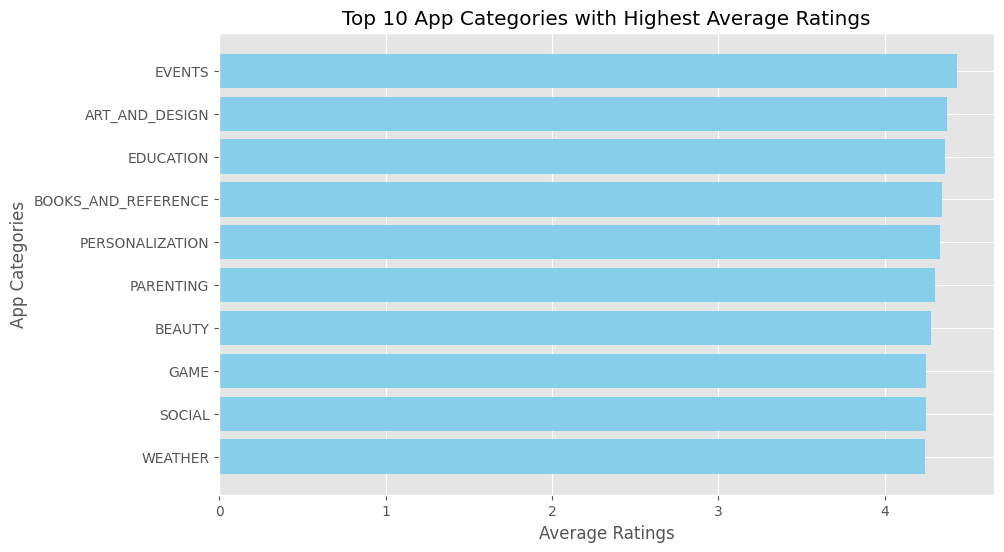

In [27]:
df = playstore.groupby('Category',as_index=False)['Rating'].mean().\
     sort_values(by=['Rating'],ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Rating')
# plt.title("Top 10 App Categories with Highest Average ")
# plt.show()

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, ratings, color='skyblue')

plt.xlabel('Average Ratings')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings')

# Show plot
plt.show()

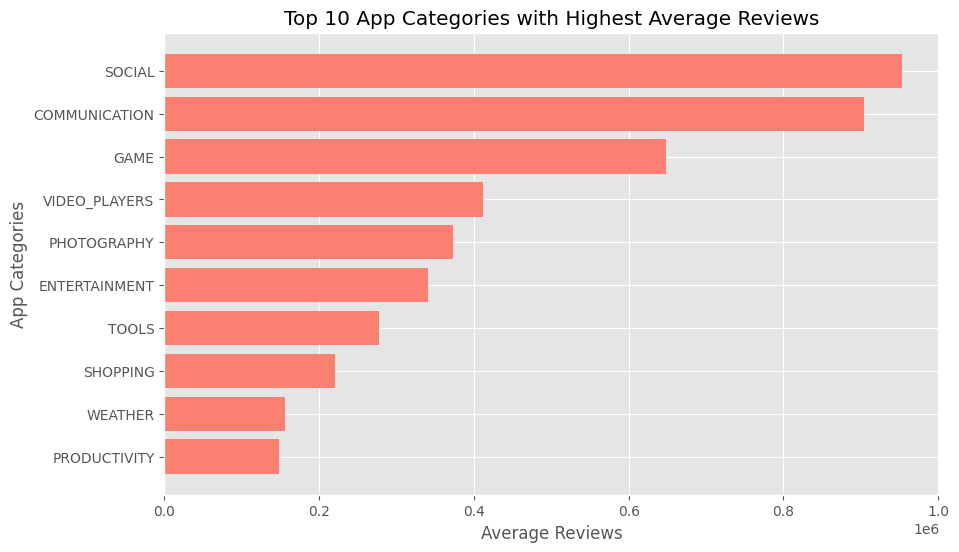

In [28]:
df = playstore.groupby('Category',as_index=False)['Reviews'].mean().\
     sort_values(by='Reviews',ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Reviews')
# plt.title("Top 10 App Categories with Highest Average Reviews")
# plt.show()

categories = df['Category'][::-1]
reviews = df['Reviews'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, reviews, color='salmon')

# Add labels and title
plt.xlabel('Average Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Reviews')

# Show plot
plt.show()

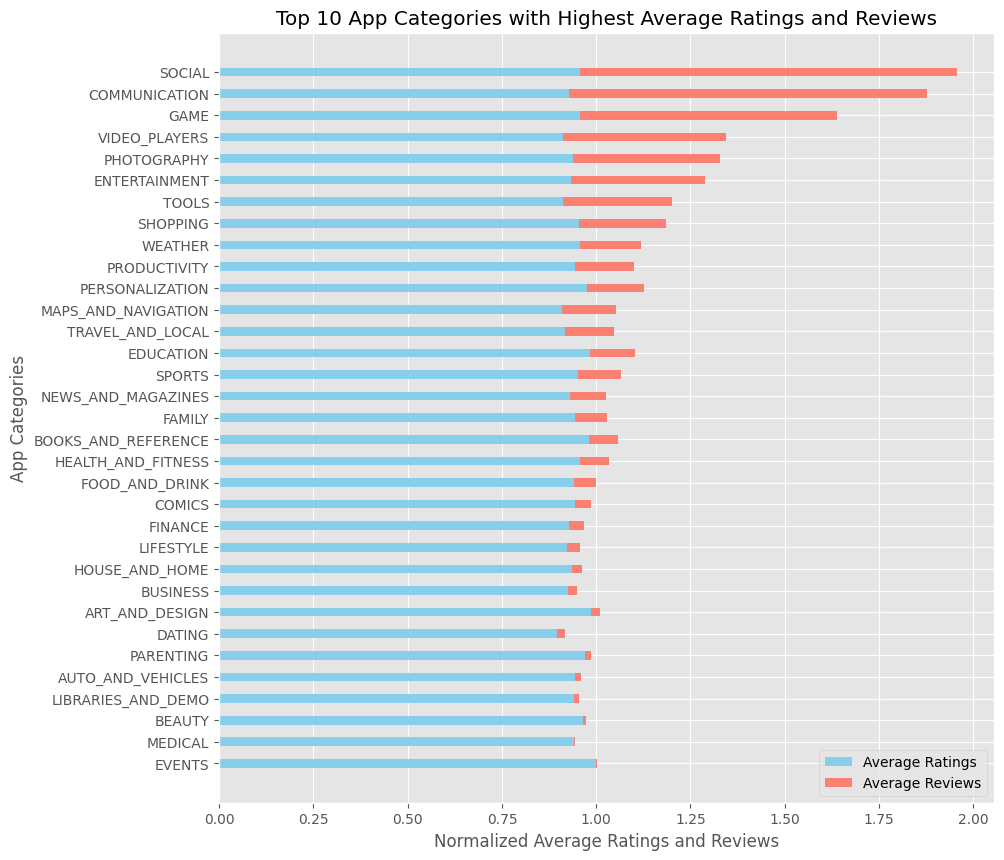

In [29]:
df = playstore.groupby('Category',as_index=False)[['Rating','Reviews']].mean().\
sort_values(by=['Reviews','Rating'],ascending = False)

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]
reviews = df['Reviews'][::-1]

# Normalize the data
ratings_norm = ratings / np.max(ratings)
reviews_norm = reviews / np.max(reviews)

# Create horizontal bar plot
plt.figure(figsize=(10, 10))
bar_width = 0.4
index = np.arange(len(categories))


plt.barh(index, ratings_norm, bar_width, color='skyblue', label='Average Ratings')
plt.barh(index, reviews_norm, bar_width, color='salmon', label='Average Reviews', left=ratings_norm)

# Add labels and title
plt.xlabel('Normalized Average Ratings and Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings and Reviews')
plt.yticks(index, categories)
plt.legend()

# Show plot
plt.show()

While App with categories such as Events , Art & Designs and Education have the highest rating on average. It should also be mention that apps from categories like Social, Communication and Games have the highest Average Reviews accross all the categories.

So the top categories are with alot of reviews and still have a relatively highest 

## Proportion of Paid Games Versus Free Games in the Dataset


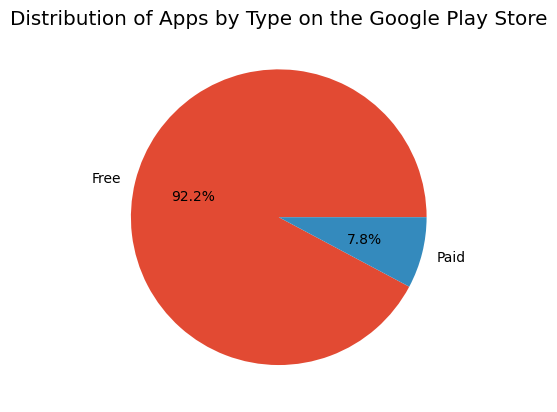

In [30]:
result = playstore.groupby('Type')['App'].count()
label = result.index
plt.pie(result, labels=label , autopct='%1.1f%%')
plt.title('Distribution of Apps by Type on the Google Play Store')
plt.show()

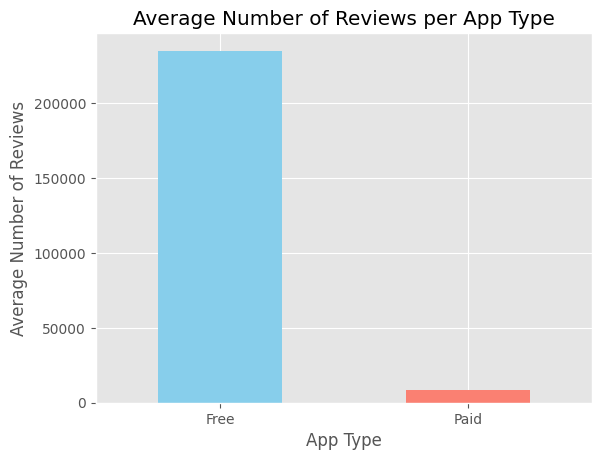

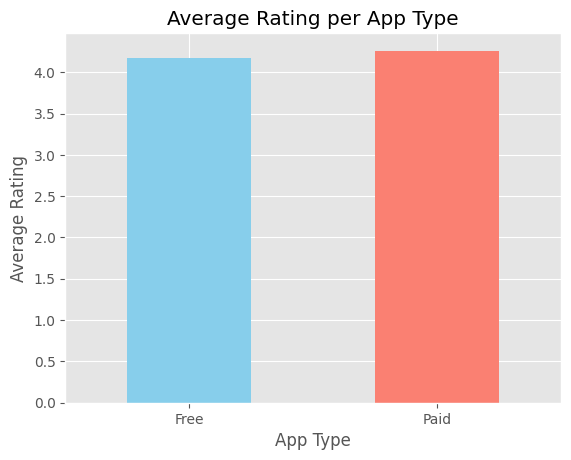

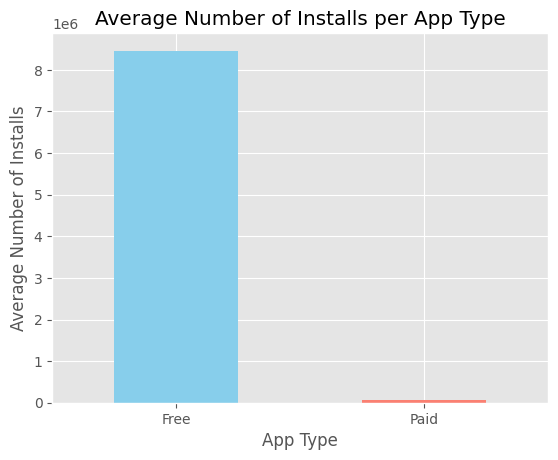

In [31]:
result = playstore.groupby('Type')['Reviews'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Number of Reviews per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Calculate and plot average rating per app type
result = playstore.groupby('Type')['Rating'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Rating per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Calculate and plot average number of installs per app type
result = playstore.groupby('Type')['Installs'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Number of Installs per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Number of Installs')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

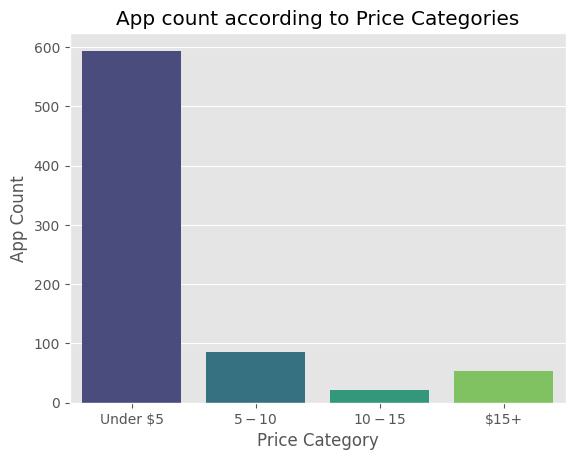

In [32]:
df = playstore[playstore['Type'] == 'Paid']

bins = [-float('inf'), 5, 10, 15, float('inf')]
labels = ['Under $5', '$5-$10', '$10-$15', '$15+']

df['Price Category'] =  pd.cut(df['Price'], bins=bins, labels=labels)

result = df['Price Category'].value_counts() 

sns.barplot(x=result.index, y=result.values, palette='viridis')

plt.ylabel('App Count')
plt.title('App count according to Price Categories')
plt.show()

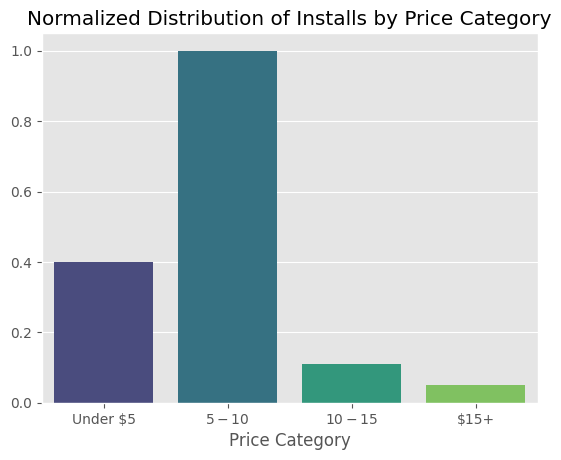

In [33]:
result = df.groupby('Price Category')['Installs'].mean()
result = result/result.max()
sns.barplot(x=result.index, y=result.values, palette='viridis')
plt.title('Normalized Distribution of Installs by Price Category')
plt.show()

The dataset reveals that approximately **92%** of the games available are free, with only **8%** being paid. This significant disparity indicates a clear preference among users for free apps, as evidenced by higher download rates for these applications. Despite their smaller market share, paid apps receive commendable reviews, averaging a **4.5 rating** across all categories. Notably, apps priced between **USD 5 and USD 10** have garnered more installs than those in other price ranges, suggesting that this price point is particularly effective at attracting users.

Therefore, developers are advised to consider offering their apps for free to maximize downloads and explore monetization strategies such as ads and in-app purchases. However, if opting to charge for the app, pricing it between **USD 5 and USD 10** appears to be the most advantageous strategy for balancing user acquisition and revenue.


## Trend of Apps Throughout the Year 2014 - 2018 

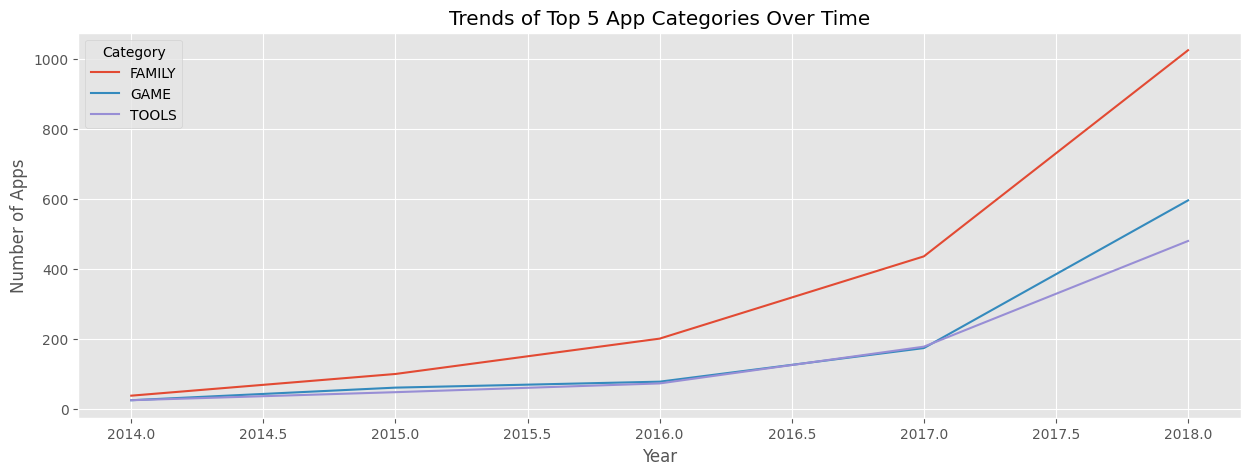

In [34]:
df = playstore.copy()
df = df[['Category', 'Last Updated', 'Genres']]

# Extract year from 'Last Updated'
df['Year'] = df['Last Updated'].dt.year

# Group by 'Category' and 'Year' and count the occurrences
result = df[df['Year'] >= 2014].groupby(['Category', 'Year'], as_index=False)['Genres'].count()

# Calculate total counts for each category
category_totals = result.groupby('Category')['Genres'].sum()

# Find the top 3 categories with the highest total counts
top_categories = category_totals.nlargest(3).index

# Filter the result DataFrame to include only the top 3 categories
filtered_result = result[result['Category'].isin(top_categories)]

# Plot the data
plt.figure(figsize=(15, 5))
sns.lineplot(data=filtered_result, x='Year', y='Genres', hue='Category')
plt.title('Trends of Top 5 App Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.legend(title='Category')
plt.show()

In [35]:
playstore[playstore['Category'] == 'GAME']['Genres'].value_counts()

Genres
Action                           299
Arcade                           185
Racing                            91
Adventure                         73
Card                              48
Board                             42
Casino                            39
Trivia                            38
Puzzle                            24
Word                              24
Casual                            23
Music                             19
Strategy                          17
Role Playing                      15
Simulation                        10
Sports                             6
Action;Action & Adventure          3
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Adventure;Action & Adventure       1
Simulation;Education               1
Casual;Action & Adventure          1
Casual;Pretend Play                1
Casual;Creativity                  1
Name: count, dtype: int64

In [36]:
playstore[playstore['App'].str.contains("Candy")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1668,Candy Crush Soda Saga,GAME,4.4,6198563,67M,100000000,Free,0.0,Everyone,Casual,2018-07-10,1.118.4,4.1 and up
1688,Candy Crush Jelly Saga,GAME,4.3,1300490,78M,50000000,Free,0.0,Everyone,Puzzle,2018-07-20,2.1.10,4.0 and up
1903,Sweet Fruit Candy,GAME,4.5,197540,29M,10000000,Free,0.0,Everyone,Puzzle,2018-07-16,79.0,4.1 and up
1980,Candy Bomb,GAME,4.4,42145,20M,10000000,Free,0.0,Everyone,Casual;Brain Games,2018-07-04,2.9.3181,4.0.3 and up
2023,Candy Pop Story,FAMILY,4.7,12948,23M,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-05-24,2.0.3165,2.3 and up
2027,Candy Smash,FAMILY,4.5,11436,15M,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-04-17,2.2.3169,4.0.3 and up
2046,Candy Day,FAMILY,4.5,11716,48M,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-08-03,8.4.3180,4.0 and up
2848,"Candy selfie - photo editor, live filter camera",PHOTOGRAPHY,4.4,53421,26M,10000000,Free,0.0,Everyone,Photography,2018-08-06,2.74.685,4.0.3 and up


In [37]:
playstore[playstore['Category']=='FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-07-23,1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,5000000,Free,0.0,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-08-02,1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,1000000,Free,0.0,Everyone,Educational;Education,2018-07-16,1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-07-04,1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50,Free,0.0,Everyone,Entertainment,2018-05-29,1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0.0,Everyone,Education,2018-06-13,2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up


# END